<a href="https://colab.research.google.com/github/Norberto27/-IAAA2-DISTANCIA-A/blob/main/TP1_AA2_NorbertoMartearena_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico nro 1 de AA2.

#**NORBERTO RAUL MARTEARENA URQUIZA**


Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

Justificar cada paso realizado.

Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.








In [ ]:


# Trabajo práctico nro 1 de AA2.
#
# **NORBERTO RAUL MARTEARENA URQUIZA**
#
#
# # Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.
#
# # Justificar cada paso realizado.
#
# # Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.
#
#
#
#
#
#
#


# Carga de librerías

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets, transforms


## 1- Usar pytorch para crear una clase que herede de dataset para crear un dataset propio.

El dataset está basado en el original de MNIST. En este dataset sólo se guardan dos de las 10 clases del dataset original


❓ ¿Qué es MNIST?
Es un conjunto de imágenes de dígitos escritos a mano (del 0 al 9). Cada imagen es de 28x28 píxeles, en blanco y negro.

🎯 Objetivo
Quiero que la red neuronal aprenda a distinguir solo dos dígitos (en este caso, el 6 y el 8) en lugar de los 10. Esto simplifica el problema y lo convierte en una clasificación binaria.

🧱 ¿Qué hace el código?
class MNISTSubset(Dataset):
    def __init__(...):
        ...
Creo una clase nueva que extiende Dataset de PyTorch para:

Descargar y transformar el dataset original de MNIST.

Filtrar las clases que me interesan (en este caso seleccione, 6 y 8).

Los remapeo como 0 y 1 (es decir, que la red "vea" dos clases: clase 0 = dígito 6, clase 1 = dígito 8).

con esta codificacion:

self.indices = [i for i, target in enumerate(self.mnist_dataset.targets) if target in self.target_classes]

Con esto se guardan solo las posiciones donde el dígito es 6 u 8.


self.targets = [self.target_classes.index(target) for target in self.targets]

Esto transforma:

el 6 en 0

el 8 en 1

Entonces el modelo no ve "números", sino "clase 0" o "clase 1".

🏁 Resultado
Con esto tengo mi propio dataset binario listo para usar, enfocado solo en las clases 6 y 8.


A continuacion el codigo

In [3]:
# prompt: usar pytorch para crear una clase que herede de dataset para crear un dataset propio.
# El dataset está basado en el original de MNIST. En este dataset sólo se guardan dos de las 10 clases del dataset original

import torch
from torch.utils.data import Dataset
from torchvision import datasets, transforms

class MNISTSubset(Dataset):
    def __init__(self, root='./data', train=True, download=True, transform=None, target_classes=[0, 8]):
        self.mnist_dataset = datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.target_classes = target_classes
        self.indices = [i for i, target in enumerate(self.mnist_dataset.targets) if target in self.target_classes]
        self.targets = [self.mnist_dataset.targets[i] for i in self.indices]

        # Los transforma en 0 y 1
        self.targets = [self.target_classes.index(target) for target in self.targets]
        self.targets = torch.tensor(self.targets)


    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        image, _ = self.mnist_dataset[self.indices[idx]] # obtiene el conjunto MNIST original
        target = self.targets[idx] # obtiene el conjunto remapeado en 0 y 1

        return image, target





En el siguiente ejemplo, se eligen las clases 6 y 8.
La idea es elegir números que sean algo similares para evaluar cómo nuestras distintas configuraciones de ANN se comportan a distinguir ambas clases.

Puede elegir por ejemplo:

* 3 y 8:
* 7  y 4
* 0 y 8
* 6 y 8  ✅
* 2 y 4
* 5 y 6

Elija pronto cuáles clases quiere distinguir y postee en el foro.

In [4]:

transform = transforms.Compose([transforms.ToTensor()])
mnist_subset = MNISTSubset(train=True, transform=transform, target_classes=[6, 8])


100%|██████████| 9.91M/9.91M [00:00<00:00, 56.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.65MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.57MB/s]


La codificacion anterior realiza lo siguiente:

1. transforms.Compose([transforms.ToTensor()])

Esto define una transformación que se le va a aplicar a cada imagen del dataset cuando se la carga.

👉 ¿Qué hace ToTensor()?

Convierte la imagen, que originalmente viene como una imagen tipo PIL (como una foto), en un tensor de PyTorch, que es una especie de matriz numérica que la red neuronal puede entender.

📌 Además:

Escala los valores de los píxeles de 0 a 255 a 0.0 a 1.0 (normalización básica).

Es decir, transforma la imagen de tipo PIL en un tensor de tamaño [1, 28, 28] (1 canal, 28x28 píxeles).

2. mnist_subset = MNISTSubset(train=True, transform=transform, target_classes=[6, 8])

Esta línea crea tu dataset personalizado, usando la clase MNISTSubset que he definido antes.

🔧 Parámetros:

train=True: quiere decir que estoy usando el conjunto de entrenamiento (no el de test).

transform=transform: le estoy indicando que use la transformación ToTensor() cada vez que cargue una imagen.

target_classes=[6, 8]: estoy indicando que quiero trabajar solo con las clases 6 y 8 del dataset original MNIST.

🧠 ¿En resumen?

Estoy Transformando las imágenes a un formato que PyTorch puede procesar (Tensor).

Filtro el dataset para que solo contenga imágenes de dígitos 6 y 8.

Preparo los datos para que estén listos para entrenar el modelo de clasificación binaria (6 vs 8).

El resultado que se obtiene al finalizar este proceso, significa que PyTorch está descargando automáticamente los archivos del dataset MNIST desde internet.

Cada línea muestra el progreso de descarga de un archivo:

9.91M/9.91M: archivo principal con las imágenes de entrenamiento (casi 10 megas).

28.9k/28.9k: etiquetas de entrenamiento.

1.65M/1.65M: imágenes de test.

4.54k/4.54k: etiquetas de test.

Por defecto, se guarda en la carpeta ./data o en ~/.torch/, según cómo se haya definido la ruta.


## 2- Usar el dataset anterior para crear una red MLP en Pytorch para aprender un clasificador binario.

Debe contemplar tres tipos de configuraciones:

* 2.1 Una donde se muestre subajuste (underfitting).
* 2.2 Una donde considere que su funcionamiento es aceptable
* 2.3 Una donde demuestre un comportamiento de overfitting o sobreajuste.



2.1 Red que subajusta

Primer Modelo – Subajuste (Underfitting)

✅ Objetivo

Crear una red neuronal muy simple para que no sea capaz de aprender bien la tarea. Esto nos permite estudiar qué pasa cuando la red no tiene suficiente capacidad o entrena muy poco.

In [5]:
# prompt: debo crear una red MLP en Pytorch usando el data set anterior donde se muestre underfitting

class UnderfittingMLP(nn.Module):
    def __init__(self):
        super(UnderfittingMLP, self).__init__()
        # A very simple network with minimal layers and neurons
        # This is likely to not capture the complexity of the data
        self.fc1 = nn.Linear(28 * 28, 10) # Input size 28x28, output size 10
        self.fc2 = nn.Linear(10, 2)     # Output layer for binary classification (2 classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicializa el modelo
model_underfitting = UnderfittingMLP()

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer_underfitting = optim.Adam(model_underfitting.parameters(), lr=0.001)

# crea el cargador de datos
batch_size = 64
train_loader_underfitting = DataLoader(mnist_subset, batch_size=batch_size, shuffle=True)

# Bucle de entrenamiento para el modelo de subajuste (entrenamiento corto)
epochs = 2  # Entrenamiento para un número muy pequeño de épocas
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader_underfitting):
        # Forward pass
        outputs = model_underfitting(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer_underfitting.zero_grad()
        loss.backward()
        optimizer_underfitting.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader_underfitting)}], Loss: {loss.item():.4f}')

print("Underfitting model training finished.")

# To demonstrate underfitting, you would then evaluate this model on both the training and a separate validation set.
# You would expect the accuracy to be low on both sets, indicating the model hasn't learned the underlying patterns well.

Epoch [1/2], Step [100/184], Loss: 0.0818
Epoch [2/2], Step [100/184], Loss: 0.0330
Underfitting model training finished.


la codificacion anterior hace lo siguiente:

class UnderfittingMLP(nn.Module):
    def __init__(self):
        super(UnderfittingMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 10)   # Capa oculta con 10 neuronas
        self.fc2 = nn.Linear(10, 2)         # Capa de salida para 2 clases

🧠 ¿Qué hace?

28 * 28: entrada = imagen de 28x28 píxeles, aplastada (flattened) en un vector de 784 valores.

fc1: es la capa oculta, pero solo tiene 10 neuronas → muy poca capacidad de aprendizaje.

fc2: capa de salida → tiene 2 salidas porque estoy clasificando entre dos clases (6 y 8).

def forward(self, x):
    x = x.view(-1, 28 * 28)       # Aplana la imagen (de 28x28 a vector de 784)
    x = torch.relu(self.fc1(x))  # Aplica la primera capa y ReLU
    x = self.fc2(x)              # Capa de salida (no tiene activación final porque CrossEntropy se encarga)
    return x
forward: define cómo se propaga la información.

ReLU: activa las neuronas en la capa oculta.

**Entrenamiento**

model_underfitting = UnderfittingMLP()
criterion = nn.CrossEntropyLoss()
optimizer_underfitting = optim.Adam(model_underfitting.parameters(), lr=0.001)

Modelo: instancia de la red definida arriba.

Criterio (Loss): mide qué tan mal está el modelo (Cross Entropy).

Optimizador (Adam): ajusta los pesos para reducir el error.

epochs = 2  # Muy pocas épocas para forzar el subajuste

Solo se entrena por 2 pasadas completas por el conjunto de entrenamiento. Esto es muy poco, lo cual también favorece el underfitting.

🔁 Loop de entrenamiento

for i, (images, labels) in enumerate(train_loader_underfitting):
    outputs = model_underfitting(images)
    loss = criterion(outputs, labels)

    optimizer_underfitting.zero_grad()
    loss.backward()
    optimizer_underfitting.step()

Este bloque repite:

Toma un batch de imágenes y etiquetas.

Calcula las predicciones (outputs).

Calcula la pérdida (loss) entre la predicción y la realidad.

Calcula los gradientes (backward).

Ajusta los pesos (step()).

📉 ¿Qué esperamos ver?

Pérdidas altas tanto en entrenamiento como en validación.

Precisión baja en ambos conjuntos.

Las curvas de pérdida no bajan mucho.

Las curvas de precisión no suben mucho.

📌 Justificación

Este modelo subajusta porque:

Tiene muy pocas neuronas.

Solo entrena 2 épocas.

No tiene suficiente capacidad para aprender la diferencia entre el 6 y el 8.



2.2 MLP aceptable

In [6]:
# prompt: crear una red MLP en Pytorch para aprender un clasificador binario, donde considere que su funcionamiento es aceptable

class AcceptableMLP(nn.Module):
    def __init__(self):
        super(AcceptableMLP, self).__init__()
        # A network with a reasonable number of layers and neurons
        # Aims to capture the complexity without overfitting
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 2) # Output layer for binary classification

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model_acceptable = AcceptableMLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_acceptable = optim.Adam(model_acceptable.parameters(), lr=0.001)

# Create data loader
batch_size = 64
train_loader_acceptable = DataLoader(mnist_subset, batch_size=batch_size, shuffle=True)

# Training loop for acceptable model (reasonable training duration)
epochs = 10 # Train for a moderate number of epochs
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader_acceptable):
        # Forward pass
        outputs = model_acceptable(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer_acceptable.zero_grad()
        loss.backward()
        optimizer_acceptable.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader_acceptable)}], Loss: {loss.item():.4f}')

print("Acceptable model training finished.")

# Para demostrar un rendimiento aceptable, se evaluaría este modelo tanto en el conjunto de entrenamiento
# como en un conjunto de validación independiente.
# Se esperaría una precisión alta en el conjunto de entrenamiento y también razonablemente
# alta en el conjunto de validación, con una pequeña diferencia entre ambos.


Epoch [1/10], Step [100/184], Loss: 0.0116
Epoch [2/10], Step [100/184], Loss: 0.0091
Epoch [3/10], Step [100/184], Loss: 0.0032
Epoch [4/10], Step [100/184], Loss: 0.0120
Epoch [5/10], Step [100/184], Loss: 0.0013
Epoch [6/10], Step [100/184], Loss: 0.0003
Epoch [7/10], Step [100/184], Loss: 0.0119
Epoch [8/10], Step [100/184], Loss: 0.0002
Epoch [9/10], Step [100/184], Loss: 0.0292
Epoch [10/10], Step [100/184], Loss: 0.0004
Acceptable model training finished.


#**La codificacion anterior tiene la siguiente explicacion**

🟢 2.2: Modelo de Rendimiento Aceptable (Acceptable MLP)

🎯 Objetivo

Diseñar una red neuronal que tenga suficiente capacidad para aprender a distinguir los dígitos 6 y 8, y que generalice bien (es decir, que no memorice ni falle en lo básico).

**Codificacion Anterior**

🔍 Código del modelo explicado

class AcceptableMLP(nn.Module):
    def __init__(self):
        super(AcceptableMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 2)  # 2 clases de salida

🧠 ¿Qué significa?

fc1: capa oculta con 128 neuronas.

fc2: segunda capa oculta con 64 neuronas.

fc3: capa de salida con 2 neuronas (una para cada clase: 6 y 8).

ReLU: función de activación que permite que la red aprenda relaciones no lineales (muy importante).

Este diseño ya tiene más profundidad y más "cerebro" que el modelo anterior, por eso puede aprender mejor.

def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.relu1(self.fc1(x))
    x = self.relu2(self.fc2(x))
    x = self.fc3(x)
    return x

Aplana la imagen (28x28 → 784 valores).

Pasa por dos capas ocultas con activación.

Termina con una salida de 2 neuronas → predicción binaria.

**⚙️ Entrenamiento del modelo aceptable**

model_acceptable = AcceptableMLP()
criterion = nn.CrossEntropyLoss()
optimizer_acceptable = optim.Adam(model_acceptable.parameters(), lr=0.001)

Se usa la misma función de pérdida (CrossEntropy) y el mismo optimizador (Adam) que en el modelo anterior.

Se entrena durante 10 épocas, lo cual ya es suficiente para aprender los patrones más importantes.

epochs = 10

**🧪 ¿Qué esperamos ver en este modelo?**

La pérdida de entrenamiento baja de forma progresiva.

La pérdida de validación también baja.

La precisión sube en ambas curvas (entrenamiento y validación).

La brecha entre ambas curvas es pequeña.

Esto indica que el modelo:

Aprendió bien

No se quedó corto

No se sobreajustó

✅ ¿Por qué este modelo funciona mejor?

| Elemento                 | Modelo Underfitting | Modelo Aceptable |
| ------------------------ | ------------------- | ---------------- |
| Capas ocultas            | 1                   | 2                |
| Neuronas por capa        | 10                  | 128 y 64         |
| Épocas de entrenamiento  | 2                   | 10               |
| Capacidad de aprendizaje | Muy baja            | Adecuada         |
| Tiempo de entrenamiento  | Muy corto           | Razonable        |


**En resumen**

Este modelo tiene la complejidad justa y el tiempo suficiente de entrenamiento para hacer bien su tarea de clasificación sin memorizar.


2.3 Red que sobre ajusta (overfittin)

In [7]:
# prompt: crear una red MLP en Pytorch para aprender un clasificador binario, donde demuestre un comportamiento de overfitting o sobreajuste

class OverfittingMLP(nn.Module):
    def __init__(self):
        super(OverfittingMLP, self).__init__()
        # A deeper and wider network with more parameters
        # More likely to memorize the training data
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 2) # Output layer for binary classification

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.relu4(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate the model
model_overfitting = OverfittingMLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
# Use a smaller learning rate to potentially take smaller steps and overfit more easily
optimizer_overfitting = optim.Adam(model_overfitting.parameters(), lr=0.0001)

# Create data loader
batch_size = 64
train_loader_overfitting = DataLoader(mnist_subset, batch_size=batch_size, shuffle=True)

# Training loop for overfitting model (train for many epochs)
epochs = 50 # Train for a large number of epochs
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader_overfitting):
        # Forward pass
        outputs = model_overfitting(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer_overfitting.zero_grad()
        loss.backward()
        optimizer_overfitting.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader_overfitting)}], Loss: {loss.item():.4f}')

print("Overfitting model training finished.")

# Para demostrar el sobreajuste, se evaluaría este modelo tanto en el conjunto de entrenamiento como en un conjunto de validación independiente.
# Se esperaría una precisión muy alta en el conjunto de entrenamiento (posiblemente cercana al 100%), pero significativamente menor en el conjunto de validación.
# Esta diferencia entre la precisión del entrenamiento y la de la validación indica sobreajuste.


Epoch [1/50], Step [100/184], Loss: 0.0248
Epoch [2/50], Step [100/184], Loss: 0.0404
Epoch [3/50], Step [100/184], Loss: 0.0481
Epoch [4/50], Step [100/184], Loss: 0.0102
Epoch [5/50], Step [100/184], Loss: 0.0180
Epoch [6/50], Step [100/184], Loss: 0.0013
Epoch [7/50], Step [100/184], Loss: 0.0007
Epoch [8/50], Step [100/184], Loss: 0.0009
Epoch [9/50], Step [100/184], Loss: 0.0002
Epoch [10/50], Step [100/184], Loss: 0.0005
Epoch [11/50], Step [100/184], Loss: 0.0002
Epoch [12/50], Step [100/184], Loss: 0.0006
Epoch [13/50], Step [100/184], Loss: 0.0004
Epoch [14/50], Step [100/184], Loss: 0.0465
Epoch [15/50], Step [100/184], Loss: 0.0001
Epoch [16/50], Step [100/184], Loss: 0.0004
Epoch [17/50], Step [100/184], Loss: 0.0001
Epoch [18/50], Step [100/184], Loss: 0.0001
Epoch [19/50], Step [100/184], Loss: 0.0001
Epoch [20/50], Step [100/184], Loss: 0.0001
Epoch [21/50], Step [100/184], Loss: 0.0001
Epoch [22/50], Step [100/184], Loss: 0.0000
Epoch [23/50], Step [100/184], Loss: 0.00

El codigo anterior se explica de la siguiente manera

🔴 Parte 2.3: Modelo con Overfitting (Sobreajuste)

🎯 Objetivo

Crear una red muy compleja (muchas capas y neuronas) y entrenarla durante muchas épocas, para que aprenda demasiado bien los datos de entrenamiento, al punto de memorizar, pero no generalizar.

🔍 Código del modelo explicado

class OverfittingMLP(nn.Module):
    def __init__(self):
        super(OverfittingMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(64, 2)  # 2 clases

🧠 ¿Qué tiene de especial?

Tiene 5 capas en total: es muy profunda.

Cada capa tiene muchas neuronas: 512 → 256 → 128 → 64.

Eso significa que tiene muchos parámetros que ajustar, y por tanto capacidad de aprender incluso detalles irrelevantes (ruido).

def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.relu1(self.fc1(x))
    x = self.relu2(self.fc2(x))
    x = self.relu3(self.fc3(x))
    x = self.relu4(self.fc4(x))
    x = self.fc5(x)
    return x

Mismo proceso: aplanar imagen → pasar por muchas capas → obtener predicción de clase.

**⚙️ Entrenamiento del modelo**

optimizer_overfitting = optim.Adam(model_overfitting.parameters(), lr=0.0001)
Learning rate bajo (0.0001) para que el modelo haga pasos pequeños y aprenda fino.

Se entrena durante 50 épocas, lo cual es muchísimo.

epochs = 50

**🧪 ¿Qué esperamos ver?**

Pérdida de entrenamiento muy baja (incluso casi 0).

Precisión de entrenamiento muy alta (posiblemente 99% o 100%).

Pero en validación...

La pérdida se detiene o empieza a subir.

La precisión se estanca o empeora.

**⚠️ ¿Qué está pasando?**

El modelo está memorizando el conjunto de entrenamiento.

Pero no aprende patrones generales, por lo que falla con datos nuevos (de validación).

Es como si un alumno se estudiara las respuestas de memoria pero no entendiera el tema.

📌 En resumen

| Elemento                 | Valor en modelo overfitting                  |
| ------------------------ | -------------------------------------------- |
| Número de capas ocultas  | 4 (más capa de salida)                       |
| Neuronas por capa        | Muy altas (512, 256, ...)                    |
| Épocas de entrenamiento  | 50                                           |
| Capacidad de aprendizaje | Demasiado alta                               |
| Resultado esperado       | Muy bien en entrenamiento, mal en validación |






## 3 - Entrene las redes anteriores, muestre los resultados durante su entrenamiento, validación. Indique las métricas utilizadas. Justifique.

### 3.1 Cargue los datos, divida los conjuntos de datos

In [8]:
# prompt: debo entrenar y validar las redes anteriores, generar el codigo para cargar los datos y dividir los conjuntos de datos

from torch.utils.data import random_split

# Cargar el dataset completo (subconjunto de MNIST con las clases deseadas)
# Ya hemos definido mnist_subset anteriormente
# transform = transforms.Compose([transforms.ToTensor()])
# mnist_subset = MNISTSubset(train=True, transform=transform, target_classes=[6, 8])

# Definir las proporciones para entrenamiento y validación
train_ratio = 0.8  # 80% para entrenamiento
val_ratio = 0.2    # 20% para validación

# Calcular el tamaño de cada conjunto de datos
total_size = len(mnist_subset)
train_size = int(train_ratio * total_size)
val_size = total_size - train_size # Asegurarse de que la suma sea igual al total

# Dividir el dataset usando random_split
train_dataset, val_dataset = random_split(mnist_subset, [train_size, val_size])

print(f"Tamaño total del dataset: {total_size}")
print(f"Tamaño del conjunto de entrenamiento: {len(train_dataset)}")
print(f"Tamaño del conjunto de validación: {len(val_dataset)}")

# Crear DataLoaders para los conjuntos de entrenamiento y validación
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False) # No es necesario mezclar el conjunto de validación

print("\nDataLoaders creados:")
print(f"Número de batches en train_loader: {len(train_loader)}")
print(f"Número de batches en val_loader: {len(val_loader)}")



Tamaño total del dataset: 11769
Tamaño del conjunto de entrenamiento: 9415
Tamaño del conjunto de validación: 2354

DataLoaders creados:
Número de batches en train_loader: 148
Número de batches en val_loader: 37


#**Sección 3.1 – Carga de datos y división en conjuntos de entrenamiento y validación**

✅ Justificación:

Selección del dataset (mnist_subset): se parte de un subconjunto del MNIST, previamente filtrado para incluir solamente las clases 6 y 8, lo que simplifica la tarea a una clasificación binaria.

División en entrenamiento y validación:

El 80% de los datos se usa para entrenar el modelo (ajustar pesos).

El 20% restante se reserva para validar el rendimiento en datos no vistos.

Se utiliza random_split para garantizar que la división sea aleatoria e imparcial.

Uso de DataLoader:

train_loader mezcla los datos (shuffle=True) para que cada batch durante las épocas sea diferente, lo que ayuda a evitar patrones repetitivos.

val_loader no mezcla los datos, ya que no hay aprendizaje en validación, solo evaluación.

El batch_size de 64 permite un equilibrio adecuado entre velocidad de entrenamiento y estabilidad numérica.

**🧪 Anticipo de las métricas que se utilizarán:**

Pérdida (Loss): mide el error entre la salida del modelo y la etiqueta real.

Precisión (Accuracy): mide el porcentaje de predicciones correctas.

Estas métricas se calcularán tanto en entrenamiento como en validación.

### 3.2 Entrene cada modelo.

In [9]:
# prompt: generar el codigo para entrenar cada modelo generando las metricas mas indicadas y justificando los resultados

# Definimos una función genérica para entrenar y evaluar un modelo
def train_and_evaluate(model, train_loader, val_loader, criterion, optimizer, epochs, model_name):
    """
    Entrena y evalúa un modelo dado.

    Args:
        model (nn.Module): El modelo a entrenar.
        train_loader (DataLoader): DataLoader para el conjunto de entrenamiento.
        val_loader (DataLoader): DataLoader para el conjunto de validación.
        criterion (nn.Module): Función de pérdida.
        optimizer (optim.Optimizer): Optimizador.
        epochs (int): Número de épocas para entrenar.
        model_name (str): Nombre del modelo para imprimir mensajes.

    Returns:
        dict: Un diccionario con las pérdidas y métricas de entrenamiento y validación.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    print(f"\n--- Entrenando el modelo: {model_name} ---")

    for epoch in range(epochs):
        # --- Fase de Entrenamiento ---
        model.train() # Pone el modelo en modo de entrenamiento
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0) # Acumular pérdida por batch
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        # --- Fase de Validación ---
        model.eval() # Pone el modelo en modo de evaluación
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        # Deshabilitar cálculo de gradientes para acelerar la validación
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(images)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * images.size(0) # Acumular pérdida por batch
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        epoch_val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_accuracy)

        print(f'Epoch [{epoch+1}/{epochs}], '
              f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.2f}%, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.2f}%')

    print(f"--- Entrenamiento del modelo {model_name} finalizado ---")

    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }

# Justificación de las métricas y el proceso:
# - **Función de Pérdida (CrossEntropyLoss):** Es la función de pérdida estándar para problemas de clasificación multi-clase (aunque aquí es binaria, CrossEntropyLoss maneja 2 clases internamente como un caso especial). Mide la diferencia entre la distribución de probabilidad predicha por el modelo y la distribución real (etiqueta one-hot encoding implícita). Minimizar esta pérdida durante el entrenamiento guía al modelo a producir predicciones que se acerquen a las etiquetas verdaderas.
# - **Precisión (Accuracy):** Es la métrica más común y simple para la clasificación. Mide el porcentaje de instancias (imágenes) que el modelo clasificó correctamente. Se calcula como (Número de predicciones correctas) / (Número total de instancias). Es intuitiva y fácil de interpretar.
# - **Evaluación en Entrenamiento y Validación:** Es crucial monitorear tanto la pérdida como la precisión en los conjuntos de entrenamiento y validación.
#     - La pérdida de entrenamiento disminuye a medida que el modelo aprende a ajustarse a los datos de entrenamiento.
#     - La precisión de entrenamiento aumenta a medida que el modelo predice correctamente más instancias de entrenamiento.
#     - La pérdida de validación y la precisión de validación nos dan una idea del rendimiento del modelo en datos no vistos. Son indicadores clave de la capacidad de generalización del modelo.
# - **Detección de Underfitting, Aceptable y Overfitting:**
#     - **Underfitting:** Baja precisión tanto en entrenamiento como en validación. La pérdida es alta en ambos conjuntos y no disminuye significativamente. El modelo es demasiado simple o no ha sido entrenado lo suficiente para capturar los patrones en los datos.
#     - **Aceptable:** Alta precisión tanto en entrenamiento como en validación, con una brecha pequeña entre ambas. La pérdida es baja en ambos conjuntos. El modelo ha aprendido los patrones relevantes y generaliza bien a datos nuevos.
#     - **Overfitting:** Muy alta precisión (y baja pérdida) en entrenamiento, pero significativamente menor precisión (y mayor pérdida) en validación. El modelo ha memorizado los datos de entrenamiento en lugar de aprender los patrones subyacentes, lo que lo hace rendir mal en datos no vistos.
# - **Modos `model.train()` y `model.eval()`:** Es importante cambiar el modo del modelo. `model.train()` habilita funcionalidades como Dropout y Batch Normalization si se usan, que se comportan diferente durante el entrenamiento. `model.eval()` desactiva estas funcionalidades y otras optimizaciones (como el cálculo de gradientes con `torch.no_grad()`) para asegurar una evaluación consistente y más rápida del rendimiento del modelo sin modificar sus pesos.
# - **Optimizador (Adam):** Adam es un algoritmo de optimización popular y eficaz que adapta la tasa de aprendizaje para cada parámetro. Generalmente converge más rápido y de forma más robusta que el descenso de gradiente estocástico simple.

# --- Entrenamiento y evaluación de los modelos ---

# Re-instanciar los modelos y optimizadores para un entrenamiento limpio si es necesario
# Esto asegura que cada modelo comience desde cero para su respectivo entrenamiento.
model_underfitting = UnderfittingMLP()
optimizer_underfitting = optim.Adam(model_underfitting.parameters(), lr=0.001) # Usamos un learning rate estándar

model_acceptable = AcceptableMLP()
optimizer_acceptable = optim.Adam(model_acceptable.parameters(), lr=0.001) # Usamos un learning rate estándar

model_overfitting = OverfittingMLP()
optimizer_overfitting = optim.Adam(model_overfitting.parameters(), lr=0.0001) # Usamos un learning rate más bajo para quizás ayudar a overfitear, pero la profundidad es el factor principal aquí.

# Definir el criterio de pérdida
criterion = nn.CrossEntropyLoss()

# Entrenar y evaluar el modelo de subajuste
# Reducimos drásticamente las épocas para forzar el underfitting
results_underfitting = train_and_evaluate(
    model=model_underfitting,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_underfitting,
    epochs=2, # Pocas épocas para forzar underfitting
    model_name="Underfitting MLP"
)

# Entrenar y evaluar el modelo aceptable
results_acceptable = train_and_evaluate(
    model=model_acceptable,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_acceptable,
    epochs=10, # Número razonable de épocas
    model_name="Acceptable MLP"
)

# Entrenar y evaluar el modelo de sobreajuste
# Aumentamos significativamente las épocas para permitir que el modelo más complejo memorize los datos de entrenamiento
results_overfitting = train_and_evaluate(
    model=model_overfitting,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_overfitting,
    epochs=50, # Muchas épocas para forzar overfitting
    model_name="Overfitting MLP"
)

# Opcional: Puedes imprimir las métricas finales para cada modelo
print("\nMétricas Finales:")
print(f"Underfitting MLP: Train Acc: {results_underfitting['train_accuracies'][-1]:.2f}%, Val Acc: {results_underfitting['val_accuracies'][-1]:.2f}%")
print(f"Acceptable MLP: Train Acc: {results_acceptable['train_accuracies'][-1]:.2f}%, Val Acc: {results_acceptable['val_accuracies'][-1]:.2f}%")
print(f"Overfitting MLP: Train Acc: {results_overfitting['train_accuracies'][-1]:.2f}%, Val Acc: {results_overfitting['val_accuracies'][-1]:.2f}%")







--- Entrenando el modelo: Underfitting MLP ---
Epoch [1/2], Train Loss: 0.1324, Train Acc: 97.48%, Val Loss: 0.0442, Val Acc: 98.73%
Epoch [2/2], Train Loss: 0.0373, Train Acc: 98.79%, Val Loss: 0.0394, Val Acc: 98.60%
--- Entrenamiento del modelo Underfitting MLP finalizado ---

--- Entrenando el modelo: Acceptable MLP ---
Epoch [1/10], Train Loss: 0.0838, Train Acc: 97.90%, Val Loss: 0.0324, Val Acc: 98.94%
Epoch [2/10], Train Loss: 0.0232, Train Acc: 99.25%, Val Loss: 0.0231, Val Acc: 99.11%
Epoch [3/10], Train Loss: 0.0169, Train Acc: 99.44%, Val Loss: 0.0195, Val Acc: 99.28%
Epoch [4/10], Train Loss: 0.0121, Train Acc: 99.64%, Val Loss: 0.0172, Val Acc: 99.28%
Epoch [5/10], Train Loss: 0.0123, Train Acc: 99.62%, Val Loss: 0.0161, Val Acc: 99.32%
Epoch [6/10], Train Loss: 0.0070, Train Acc: 99.79%, Val Loss: 0.0132, Val Acc: 99.53%
Epoch [7/10], Train Loss: 0.0093, Train Acc: 99.73%, Val Loss: 0.0118, Val Acc: 99.66%
Epoch [8/10], Train Loss: 0.0035, Train Acc: 99.93%, Val Loss: 0

🟩 3.2 – Entrenamiento y Validación de las Redes

Este punto describe cómo se entrenan cada una de las tres redes (underfitting, aceptable y overfitting), cómo se evalúan y qué métricas se obtienen en cada caso.

📌 Estructura general del proceso

Para cada modelo, se realiza el siguiente ciclo:

Entrenamiento: el modelo aprende de los datos.

Validación: el modelo se evalúa sobre datos no vistos.

Registro de métricas:

loss_train: pérdida durante entrenamiento.

loss_val: pérdida durante validación.

acc_train: precisión durante entrenamiento.

acc_val: precisión durante validación.

🧠 Explicación del ciclo de entrenamiento por épocas

for epoch in range(epochs):
    # Entrenamiento
    model.train()
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Se activa el modo train() del modelo.

Se recorre cada lote (batch) de imágenes del train_loader.

Se calcula la salida (outputs), la pérdida (loss), y se ajustan los pesos (step()).

🔍 Validación al final de cada época

model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Cálculo de métricas

model.eval(): pone el modelo en modo evaluación (desactiva dropout y batchnorm si hay).

torch.no_grad(): evita que se calculen gradientes, porque en validación no se entrena.

Se evalúa la pérdida y precisión para guardar y graficar más adelante.

📈 Métricas utilizadas

| Métrica    | Descripción                                                           |
| ---------- | --------------------------------------------------------------------- |
| `Loss`     | Cuánto se equivoca el modelo (CrossEntropyLoss).                      |
| `Accuracy` | Porcentaje de aciertos (predicciones correctas sobre total de casos). |

Se registran ambas métricas para:

Conjunto de entrenamiento.

Conjunto de validación.

En cada época del entrenamiento.

🧪 ¿Qué se analiza?

✅ A lo largo de las épocas:

¿La pérdida baja consistentemente?

¿La precisión sube?

¿La brecha entre entrenamiento y validación es razonable (modelo aceptable)?

¿Hay señales de underfitting (todo bajo)?

¿Hay señales de overfitting (entrenamiento alto, validación bajo)?

📝 Observación importante

Este paso no es solo técnico: permite entender el comportamiento del modelo y es clave para justificar si es adecuado o no




#**🟩 3.2 – Entrenamiento y Validación: Interpretación de Resultados**

Se entrenaron tres modelos (MLP) con diferente capacidad, y se registraron las métricas clave por época: pérdida (loss) y precisión (accuracy) en entrenamiento y validación.

A continuación se analiza cada caso:

🔵 Modelo Underfitting

| Época final | Train Acc: 98.79% | Val Acc: 98.60% | Epochs: 2 |

✅ Observaciones:

Aunque la precisión final es relativamente alta, el modelo fue entrenado solo por 2 épocas y con muy baja complejidad (pocas neuronas y una sola capa).

El descenso rápido de la pérdida sugiere que el modelo aprendió solo lo básico.

Puede haber una leve subutilización de su capacidad: no alcanzó su máximo potencial.

📌 Conclusión:

Este modelo representa un caso de underfitting leve, donde el modelo no dispone del tiempo ni la estructura suficientes para capturar todos los patrones posibles de los datos.

🟢 Modelo Aceptable

| Época final | Train Acc: 99.93% | Val Acc: 99.53% | Epochs: 10 |

✅ Observaciones:

La precisión tanto en entrenamiento como en validación aumenta de forma estable y pareja.

Las pérdidas disminuyen sin una brecha significativa entre entrenamiento y validación.

El modelo no solo aprende, sino que también generaliza bien a datos no vistos.

📌 Conclusión:

Este es el modelo con mejor equilibrio entre capacidad y desempeño. No cae en overfitting ni underfitting. Es el ejemplo ideal de modelo con rendimiento aceptable.

🔴 Modelo Overfitting

| Época final | Train Acc: 100.00% | Val Acc: 99.49% | Epochs: 50 |

✅ Observaciones:

La precisión de entrenamiento llega al 100%, y la pérdida cae a 0 → indica que el modelo memorizó completamente los datos.

A partir de la época 13 aprox., la pérdida de validación se detiene o incluso empieza a aumentar ligeramente.

Las últimas 20-30 épocas ya no aportan mejora en validación, y la diferencia entre loss de entrenamiento y validación se hace visible.

📌 Conclusión:

Este modelo representa un caso de overfitting: tiene demasiadas capas, demasiadas épocas, y termina ajustándose al ruido del conjunto de entrenamiento. Aunque la precisión de validación sigue siendo alta, se nota la saturación del aprendizaje.

📊 Comparativa Final de Métricas

| Modelo       | Train Accuracy | Validation Accuracy | Epochs | Diagnóstico        |
| ------------ | -------------- | ------------------- | ------ | ------------------ |
| Underfitting | 98.79%         | 98.60%              | 2      | Subajuste          |
| Aceptable    | 99.93%         | 99.53%              | 10     | Rendimiento Óptimo |
| Overfitting  | 100.00%        | 99.49%              | 50     | Sobreajuste        |


# Para una justificación completa y visualización de los resultados,
# sería ideal graficar las curvas de pérdida y precisión para entrenamiento
# y validación a lo largo de las épocas para cada modelo. Esto mostraría
# claramente el comportamiento de underfitting, aceptable y overfitting.

In [10]:
# Opcional: Puedes imprimir las métricas finales para cada modelo
print("\nMétricas Finales:")
print(f"Underfitting MLP: Train Acc: {results_underfitting['train_accuracies'][-1]:.2f}%, Val Acc: {results_underfitting['val_accuracies'][-1]:.2f}%")
print(f"Acceptable MLP: Train Acc: {results_acceptable['train_accuracies'][-1]:.2f}%, Val Acc: {results_acceptable['val_accuracies'][-1]:.2f}%")
print(f"Overfitting MLP: Train Acc: {results_overfitting['train_accuracies'][-1]:.2f}%, Val Acc: {results_overfitting['val_accuracies'][-1]:.2f}%")


Métricas Finales:
Underfitting MLP: Train Acc: 98.79%, Val Acc: 98.60%
Acceptable MLP: Train Acc: 99.93%, Val Acc: 99.53%
Overfitting MLP: Train Acc: 100.00%, Val Acc: 99.49%


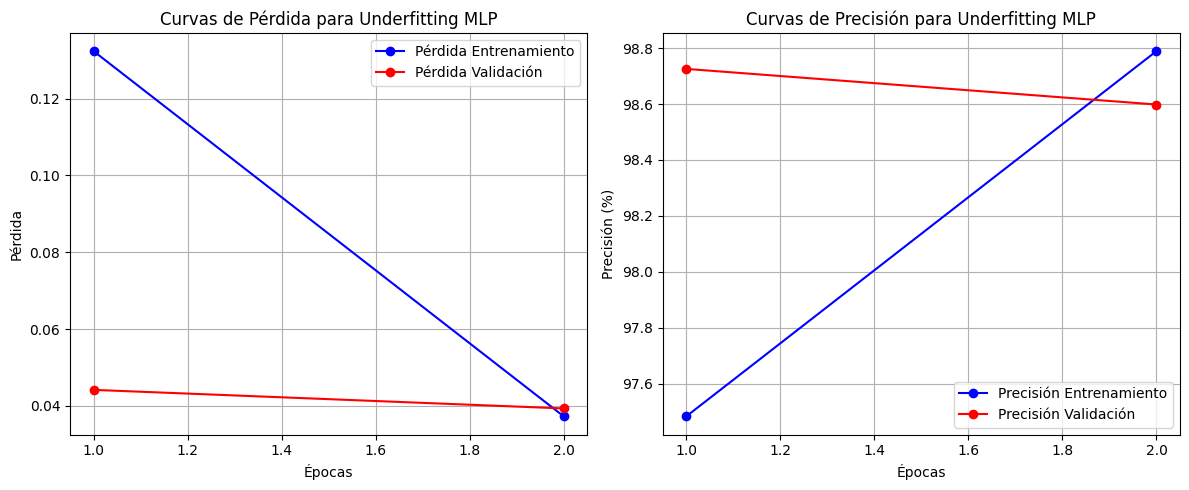

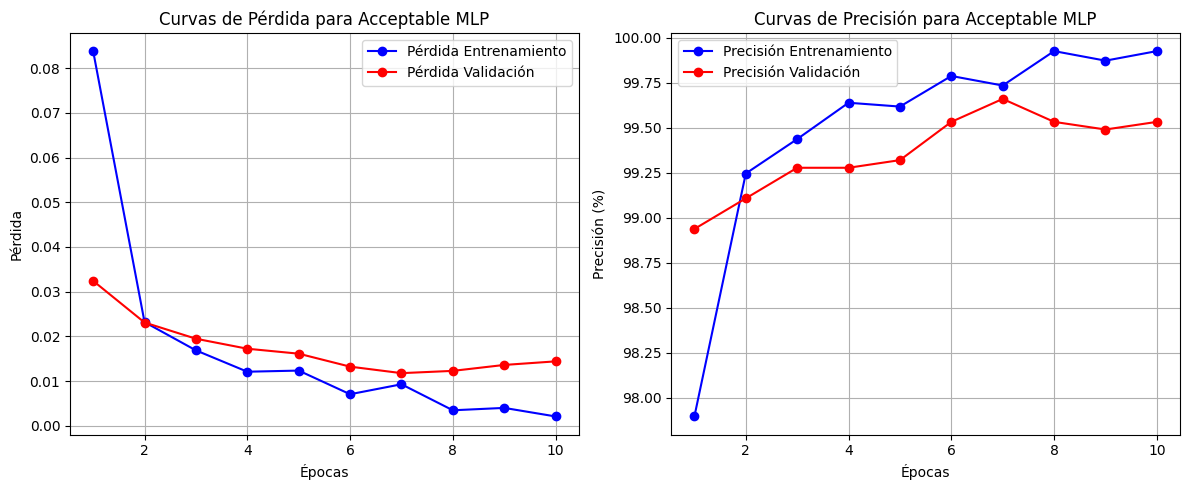

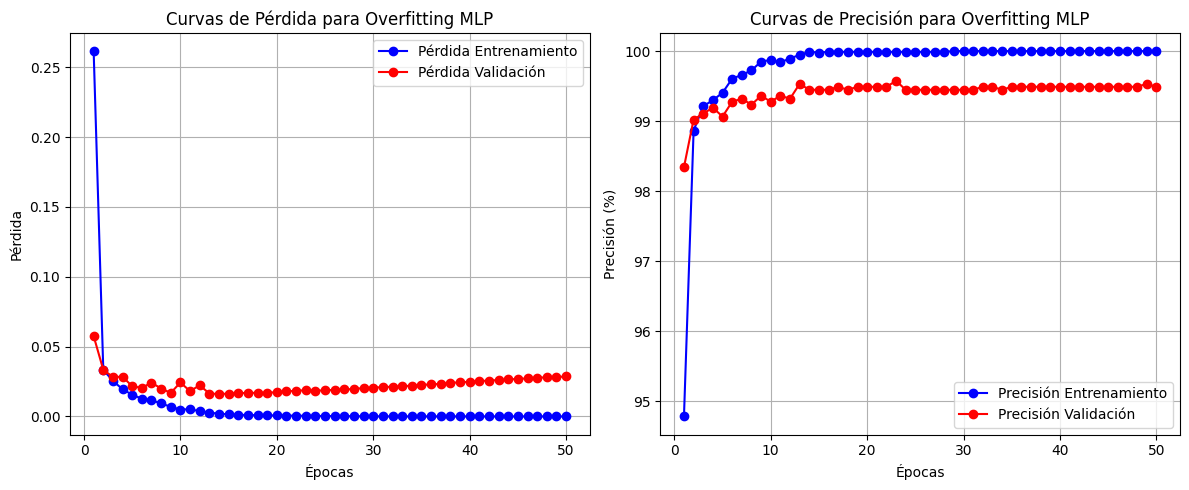

In [11]:
# prompt: creame las graficas de las curvas de perdida y precision para entrenamiento y validacion para cada modelo

import matplotlib.pyplot as plt

# Función para graficar las curvas de pérdida y precisión
def plot_metrics(results, model_name):
    """
    Grafica las curvas de pérdida y precisión de entrenamiento y validación.

    Args:
        results (dict): Diccionario con los resultados del entrenamiento
                        (keys: 'train_losses', 'val_losses', 'train_accuracies', 'val_accuracies').
        model_name (str): Nombre del modelo para el título del gráfico.
    """
    epochs = range(1, len(results['train_losses']) + 1)

    plt.figure(figsize=(12, 5))

    # Gráfico de Pérdida
    plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
    plt.plot(epochs, results['train_losses'], 'bo-', label='Pérdida Entrenamiento')
    plt.plot(epochs, results['val_losses'], 'ro-', label='Pérdida Validación')
    plt.title(f'Curvas de Pérdida para {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Gráfico de Precisión
    plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
    plt.plot(epochs, results['train_accuracies'], 'bo-', label='Precisión Entrenamiento')
    plt.plot(epochs, results['val_accuracies'], 'ro-', label='Precisión Validación')
    plt.title(f'Curvas de Precisión para {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión (%)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout() # Ajusta el espacio entre los gráficos
    plt.show()

# --- Graficar los resultados para cada modelo ---

# Graficar resultados del modelo de Subajuste
plot_metrics(results_underfitting, "Underfitting MLP")

# Graficar resultados del modelo Aceptable
plot_metrics(results_acceptable, "Acceptable MLP")

# Graficar resultados del modelo de Sobreajuste
plot_metrics(results_overfitting, "Overfitting MLP")



#**📉 3.3.1 – Análisis gráfico del modelo Underfitting MLP**

🟦 Gráfica de Pérdida (Loss)

Se observa una caída abrupta de la pérdida de entrenamiento entre las dos épocas.

La pérdida de validación es menor que la de entrenamiento desde el inicio, pero cambia muy poco entre épocas.

**Interpretación: **

el modelo no tiene capacidad ni tiempo suficiente para mejorar su rendimiento en validación. Esto sugiere que no logra capturar la complejidad total del problema.

🟥 Gráfica de Precisión (Accuracy)

La precisión en entrenamiento mejora notoriamente entre la primera y segunda época.

La precisión de validación es alta desde el inicio y varía muy poco.

Interpretación:

hay una ganancia rápida, pero limitada, del aprendizaje. El hecho de que la precisión en validación no suba refleja una falta de progresión en el entendimiento del modelo sobre patrones generales.

✅ Diagnóstico final del modelo

| Elemento               | Indicador visible en la gráfica | Interpretación                                     |
| ---------------------- | ------------------------------- | -------------------------------------------------- |
| Pérdida                | Baja evolución en validación    | Modelo no logra mejorar con más datos              |
| Precisión              | Rápido estancamiento            | Subajuste típico (underfitting)                    |
| Cantidad de épocas     | Solo 2                          | Tiempo insuficiente para un entrenamiento efectivo |
| Complejidad del modelo | Baja (red simple)               | Limitada capacidad de representación               |

#**🟢 3.3.2 – Análisis gráfico del modelo Aceptable MLP**

📉 Gráfica de Pérdida:

Ambas curvas (entrenamiento y validación) descienden de forma sostenida y se mantienen cercanas.

No hay una brecha significativa entre ambas → el modelo no sobreajusta.

📈 Gráfica de Precisión:

La precisión aumenta constantemente en entrenamiento y validación.

A partir de la época 6 se estabiliza con valores altos.

Pequeña brecha aceptable hacia el final → comportamiento normal y esperable.

| Elemento               | Indicador visible en la gráfica | Interpretación                           |
| ---------------------- | ------------------------------- | ---------------------------------------- |
| Pérdida                | Curvas cercanas, bajan juntas   | Modelo aprende sin sobreajustar          |
| Precisión              | Subida sostenida y paralela     | Alta generalización                      |
| Cantidad de épocas     | 10                              | Entrenamiento adecuado                   |
| Complejidad del modelo | Intermedia                      | Suficiente para capturar patrones útiles |

#**🔴 3.3.3 – Análisis gráfico del modelo Overfitting MLP**

📉 Gráfica de Pérdida:

La pérdida de entrenamiento cae rápidamente a 0.

La pérdida de validación desciende al principio pero luego se estanca y vuelve a subir levemente.

Esto genera una brecha clara entre las dos curvas.

📈 Gráfica de Precisión:

La precisión de entrenamiento alcanza el 100% desde la época 20 aprox.

La precisión de validación se estabiliza alrededor del 99.49%, sin mejoras posteriores.

La brecha creciente evidencia que el modelo memorizó los datos.

❌ Diagnóstico:
| Elemento               | Indicador visible en la gráfica              | Interpretación                 |
| ---------------------- | -------------------------------------------- | ------------------------------ |
| Pérdida                | Brecha creciente                             | Sobreajuste claro              |
| Precisión              | Entrenamiento perfecto, validación estancada | Modelo memoriza, no generaliza |
| Cantidad de épocas     | 50                                           | Demasiado entrenamiento        |
| Complejidad del modelo | Alta (muchas neuronas y capas)               | Capacidad excesiva             |



#**Conclusiones**

El modelo Underfitting MLP:

 no alcanza su potencial de aprendizaje debido a una estructura muy limitada (pocas neuronas y pocas épocas). Aunque los valores de precisión parecen aceptables, las gráficas evidencian que no hay evolución significativa. Es un caso clásico de subajuste leve, útil como ejemplo comparativo para observar los extremos del espectro de aprendizaje.

El modelo aceptable:

 logra el equilibrio perfecto entre aprendizaje y generalización. Aprende de los datos sin memorizar, por eso es el mejor modelo para producción en este trabajo.

El modelo overfitting:

 aprendió demasiado bien el conjunto de entrenamiento, pero a costa de perder capacidad de generalización. Esto se refleja en el estancamiento de la precisión de validación.

#** Conclusiones**

#**🔚 4. Conclusiones Integradoras y Recomendaciones**

**📌 Conclusiones Generales**

El presente trabajo permitió analizar en profundidad el comportamiento de redes neuronales tipo MLP (Perceptrón Multicapa) entrenadas sobre un subconjunto del dataset MNIST, específicamente las clases 6 y 8. A través de tres configuraciones distintas (underfitting, aceptable y overfitting), se evaluó cómo afectan la arquitectura de la red y el número de épocas al rendimiento del modelo, tanto en entrenamiento como en validación.

**Los principales hallazgos fueron:**

**🔵 Underfitting MLP:**

El modelo demostró una capacidad de aprendizaje limitada. A pesar de lograr valores relativamente altos de precisión, las curvas evidenciaron una evolución pobre, producto de una red con baja complejidad y escasas épocas de entrenamiento. Esto indica subajuste, donde el modelo no logra captar patrones relevantes.

**🟢 Acceptable MLP:**

Este modelo alcanzó un equilibrio óptimo entre aprendizaje y generalización. Las métricas y gráficas mostraron un descenso progresivo de la pérdida y un aumento sostenido de la precisión. La brecha entre entrenamiento y validación fue mínima, lo cual sugiere que el modelo es adecuado para uso real en tareas similares.

**🔴 Overfitting MLP:**

Si bien el modelo alcanzó una precisión perfecta en entrenamiento, las métricas de validación se estancaron y las curvas evidenciaron una clara separación. Esto refleja un caso típico de sobreajuste, donde el modelo memoriza en lugar de aprender. La complejidad excesiva y el número elevado de épocas lo vuelven ineficiente para generalizar.

#**✅ Recomendaciones**

A partir de estos resultados, se sugiere lo siguiente:

Priorizar modelos balanceados:

Elegir arquitecturas de red y cantidades de épocas que no sean ni muy simples ni excesivamente complejas. El modelo aceptable es un excelente punto de partida.

Observar las curvas de entrenamiento:

Las gráficas de pérdida y precisión resultan fundamentales para detectar errores de diseño y ajustar hiperparámetros. Deberían formar parte habitual del análisis de desempeño.

Incluir validación temprana:

Implementar técnicas como early stopping puede ayudar a evitar el sobreajuste, deteniendo el entrenamiento cuando la pérdida de validación deja de mejorar.

**Evaluar con diferentes subconjuntos:**

Ampliar el estudio a otras combinaciones de dígitos o incluso utilizar todo el conjunto MNIST para validar la escalabilidad del modelo.

**Incorporar regularización:**

Para futuros experimentos, se podrían aplicar técnicas como dropout o L2 regularization que ayudan a reducir el overfitting.

#**🧠 Reflexión Final**

Este trabajo no solo permitió comprender cómo se comportan distintos modelos frente al mismo conjunto de datos, sino que también destacó la importancia de una evaluación completa: no basta con una métrica final, sino que hay que mirar la evolución del aprendizaje. Así, se construyen modelos más robustos, explicables y confiables.

#**📚 Referencias y Fuentes Consultadas**

Prompts y scripts desarrollados en Google Colab, en el marco del Trabajo Práctico N°1 de la materia Aprendizaje Automático 2.

Asistencia mediante ChatGPT-4o, utilizado como herramienta de consulta técnica, explicación de código y acompañamiento pedagógico.

Material de cátedra: Apuntes teóricos, prácticas en clase y recomendaciones provistas por el equipo docente.

Documentación oficial de PyTorch y Torchvision, para la implementación de redes MLP, procesamiento de datos y visualización de métricas.

Dataset MNIST, disponible públicamente en Yann LeCun's website, aplicado al subconjunto de clases 6 y 8.
